In [ ]:
#Assumptions in MultiLinear REgression
#Linear : The relationship b/w the predicators and the response is linear
#Independence: Observations are idependent of each other
#Homoscedasticity: The residuals (difference between observed and predicted values) exhibit constant variables
#Normal Distrubution of Errors : The residulas of the model are normally distributed.
#No multicollinearity: The ide[endent variables should not be too higly correlated with each other]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Cars.csv to Cars.csv


In [4]:
Cars = pd.read_csv("Cars.csv")
print(Cars)

     HP        MPG  VOL          SP         WT
0    49  53.700681   89  104.185353  28.762059
1    55  50.013401   92  105.461264  30.466833
2    55  50.013401   92  105.461264  30.193597
3    70  45.696322   92  113.461264  30.632114
4    53  50.504232   92  104.461264  29.889149
..  ...        ...  ...         ...        ...
76  322  36.900000   50  169.598513  16.132947
77  238  19.197888  115  150.576579  37.923113
78  263  34.000000   50  151.598513  15.769625
79  295  19.833733  119  167.944460  39.423099
80  236  12.101263  107  139.840817  34.948615

[81 rows x 5 columns]


In [5]:
Cars = pd.DataFrame(Cars, columns=["HP", "VOL", "SP", "WT", "MPG"])
Cars.head()


,HP,VOL,SP,WT,MPG
0,49,89,104.185353,28.762059,53.700681
1,55,92,105.461264,30.466833,50.013401
2,55,92,105.461264,30.193597,50.013401
3,70,92,113.461264,30.632114,45.696322
4,53,92,104.461264,29.889149,50.504232


In [ ]:
#_MpG: Milege of the car
#hp: Horse power of the car
#VOL: Volume of the car
#SP: top speed of the car
#WT: weight of the car

In [6]:
Cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   VOL     81 non-null     int64  
 2   SP      81 non-null     float64
 3   WT      81 non-null     float64
 4   MPG     81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [7]:
Cars.isna().sum()

,0
HP,0
VOL,0
SP,0
WT,0
MPG,0


In [ ]:
#OBSERVATIONS
#no missing values are oberseved here
#the data types of each column are relevent

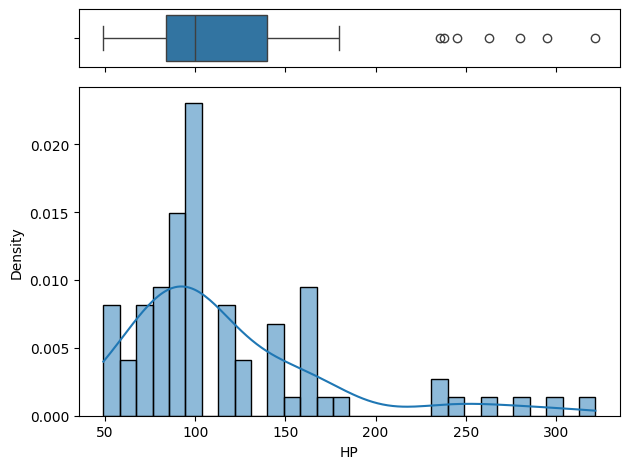

In [8]:
# Create a figure with two subplots (one above the other)
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Creating a boxplot
sns.boxplot(data=Cars, x='HP', ax=ax_box, orient='h')
ax_box.set(xlabel='')  # Remove x label for the boxplot

# Creating a histogram in the same x-axis
sns.histplot(data=Cars, x='HP', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')

# Adjust Layout
plt.tight_layout()
plt.show()

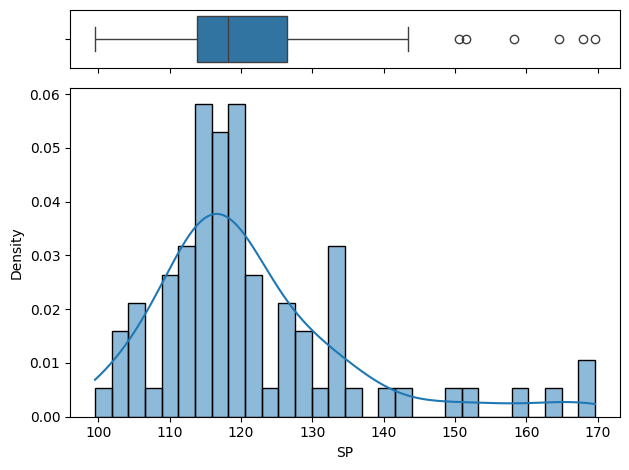

In [9]:
# Create a figure with two subplots (one above the other)
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Creating a boxplot
sns.boxplot(data=Cars, x='SP', ax=ax_box, orient='h')
ax_box.set(xlabel='')  # Remove x label for the boxplot

# Creating a histogram in the same x-axis
sns.histplot(data=Cars, x='SP', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')

# Adjust Layout
plt.tight_layout()
plt.show()

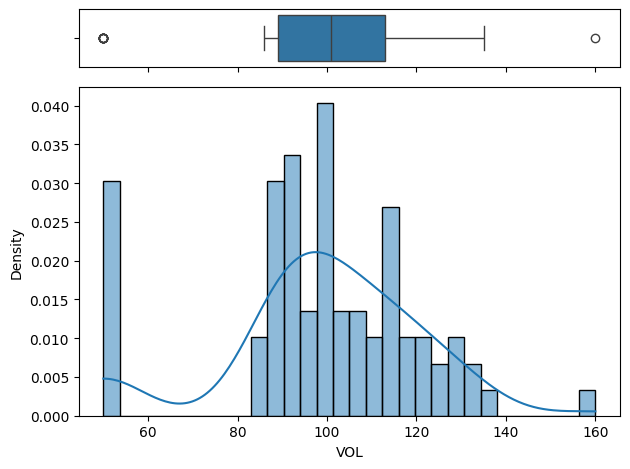

In [10]:
# Create a figure with two subplots (one above the other)
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Creating a boxplot
sns.boxplot(data=Cars, x='VOL', ax=ax_box, orient='h')
ax_box.set(xlabel='')  # Remove x label for the boxplot

# Creating a histogram in the same x-axis
sns.histplot(data=Cars, x='VOL', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')

# Adjust Layout
plt.tight_layout()
plt.show()

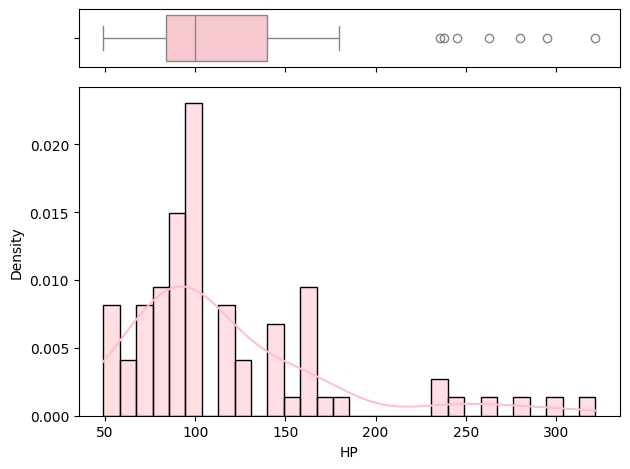

In [11]:
# Create a figure with two subplots (one above the other)
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Creating a boxplot
sns.boxplot(data=Cars, x='HP', ax=ax_box, orient='h', color='pink')
ax_box.set(xlabel='')  # Remove x label for the boxplot

# Creating a histogram in the same x-axis
sns.histplot(data=Cars, x='HP', ax=ax_hist, bins=30, kde=True, stat="density", color='pink')
ax_hist.set(ylabel='Density')

# Adjust Layout
plt.tight_layout()
plt.show()

In [ ]:
#OBESERVATION
#tHERE ARE SOME EXTREME VALUES OBSERVED IN TOWARDS THE RIGHT TAIL OF SP AND HP sns.distributions
#IN VOL AND WT COLUMNS, A FEW OUTLIERS ARE OBSERVED IN BOTH TAILS OF SP AND HP sns.distributions
#AS THIS IS MULTI-DEIMENSIONAL DATA THE OUTLIERS WITH RESPECT TO SPATIAL DIMESIONS MAY HAVE TO BE CONSIDERED WHILE BULIDING THE REGRESSION MODEL
#AS THIS IS MULTI-DIMENSIONAL DATA, THE OUTLIERS WITH RESPECT TO SPATIAL DIMESIONS MAY HAVE TO BE CONSIDERED WHILE BUILDING THE REGRESSION MODEL

In [12]:
Cars[Cars.duplicated()]

,HP,VOL,SP,WT,MPG


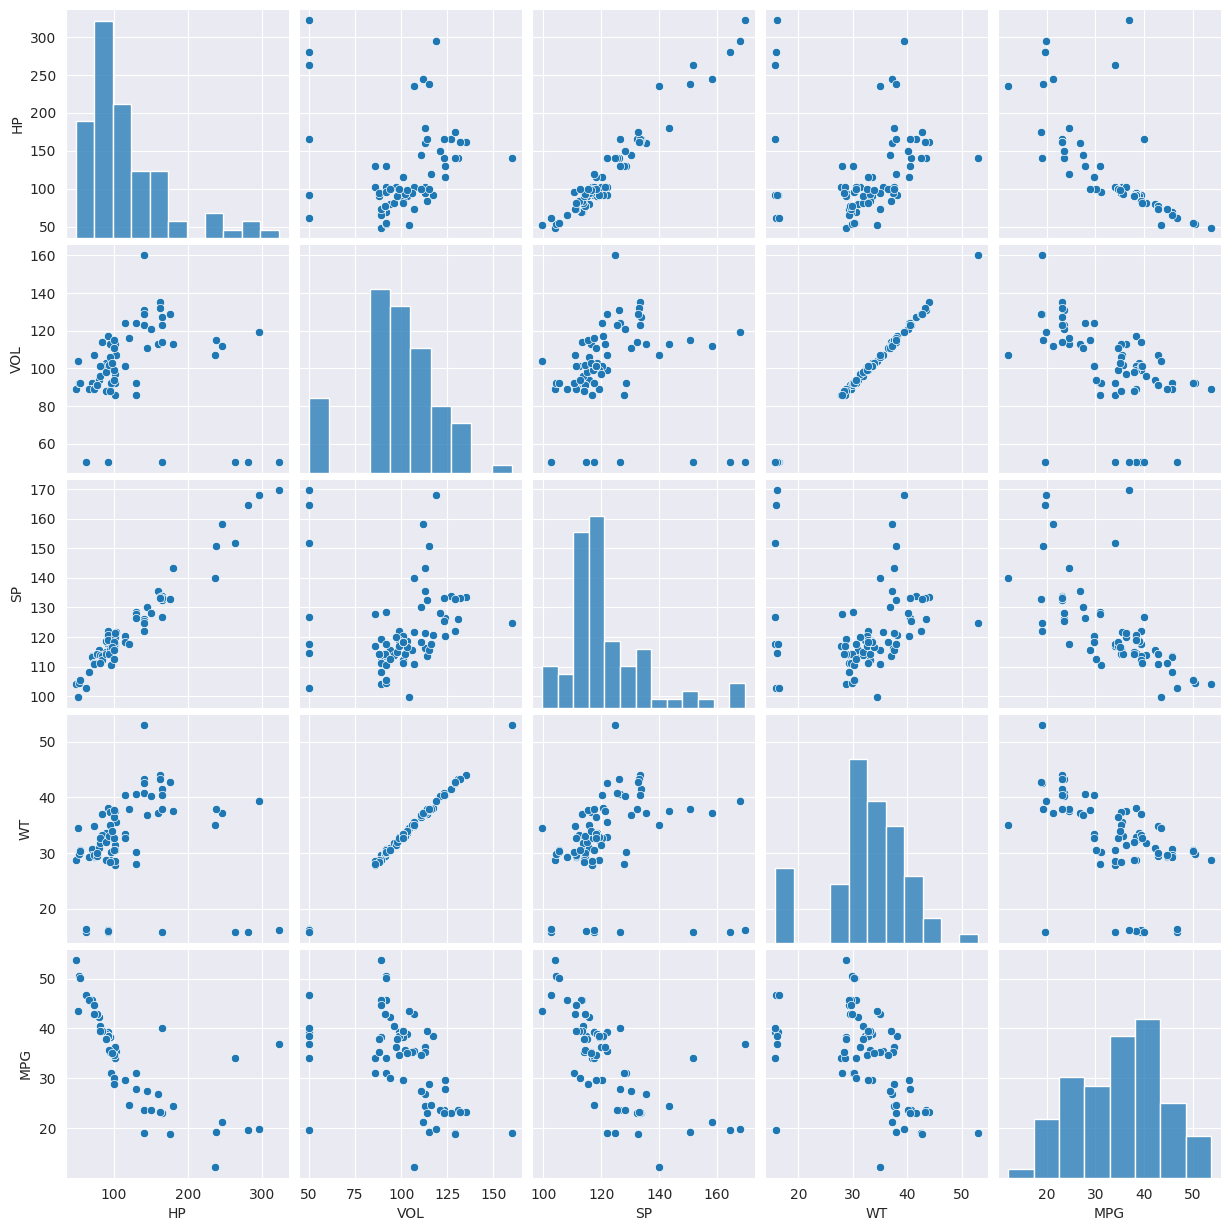

In [13]:
sns.set_style(style='darkgrid')
sns.pairplot(Cars)

In [14]:
Cars.corr()

,HP,VOL,SP,WT,MPG
HP,1.000000,0.077459,0.973848,0.076513,-0.725038
VOL,0.077459,1.000000,0.102170,0.999203,-0.529057
SP,0.973848,0.102170,1.000000,0.102439,-0.687125
WT,0.076513,0.999203,0.102439,1.000000,-0.526759
MPG,-0.725038,-0.529057,-0.687125,-0.526759,1.000000


In [ ]:
#observations
#hp and #sp has the highest correlation
#vol and #wt has the strongest relation
#hp and sp increases with horse power.


In [15]:
model1 = smf.ols('MPG~WT+VOL+SP+HP',data=Cars).fit()

In [16]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           1.54e-23
Time:                        05:34:27   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#OBSRVATIONS
-the ideal range of VIF values shall be between 0 to 10. However slightly higher values can be tolerated
-AS seen from the very high VIF values for VOL AND WT, it is clearly that they are prone to multiprocessing
Hence it is decided to drop one of the column.




In [17]:
Cars1 = Cars.drop("WT",axis=1)
Cars1.head()

,HP,VOL,SP,MPG
0,49,89,104.185353,53.700681
1,55,92,105.461264,50.013401
2,55,92,105.461264,50.013401
3,70,92,113.461264,45.696322
4,53,92,104.461264,50.504232


In [18]:
import statsmodels.formula.api as smf
model2 = smf.ols('MPG~VOL+SP+HP', data=Cars1).fit()

In [19]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     86.11
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           1.56e-24
Time:                        05:34:37   Log-Likelihood:                -233.99
No. Observations:                  81   AIC:                             476.0
Df Residuals:                      77   BIC:                             485.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9234     14.466      2.069      0.042       1.118      58.729
VOL           -0.2017      0.023     -8.928      0.000      -0.247      -0.157
SP             0.4007      0.156      2.571      0.012       0.090       0.711
HP            -0.2067      0.039     -5.353      0.000      -0.284      -0.130
==============================================================================
Omnibus:                       10.810   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.822
Skew:                           0.704   Prob(JB):                      0.00271
Kurtosis:                       4.233   Cond. No.                     5.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

####performance metrics for model 2


In [20]:
df2 = pd.DataFrame()
df2["Actual_y2"] = Cars["MPG"]
df2.head()

,Actual_y2
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232


In [21]:
pred_y2 = model2.predict(Cars.iloc[:,0:4])
df2["Predicted_y2"] = pred_y2
df2.head()


,Actual_y2,Predicted_y2
0,53.700681,43.590769
1,50.013401,42.256794
2,50.013401,42.256794
3,45.696322,42.361497
4,50.504232,42.269544


In [23]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df2["Actual_y2"], df2["Predicted_y2"])
print("MSE :",mse)
print("RMSE: ",np.sqrt(mse))

MSE : 18.911053388711217
RMSE:  4.348684098518909


observations:
the adjusted R_squared value improved slightly to 0.76
All the p-value for model parameters are less than 5% hence they are significant

In [ ]:
Cars.shape

(81, 5)

In [22]:
k = 3
n = 81
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.14814814814814814

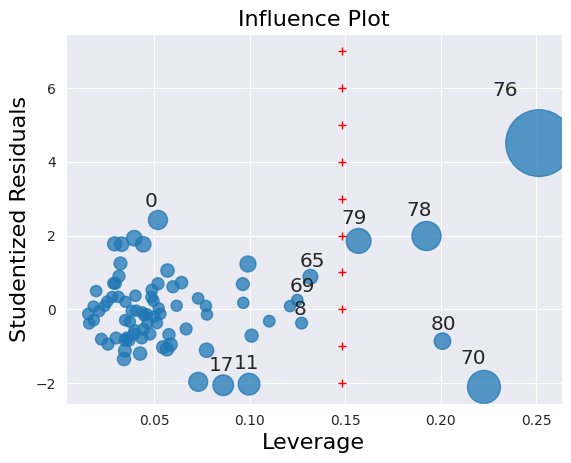

In [24]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1,alpha=.05)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')
plt.show()


observations
from the above plot, it is evident that data points 65,70,76,78,80 are the influenecers
as their H leverage values are higher and size is higher


In [25]:
Cars1[Cars1.index.isin([65,70,76,78,80])]

,HP,VOL,SP,MPG
65,165,50,126.598513,40.050000
70,280,50,164.598513,19.678507
76,322,50,169.598513,36.900000
78,263,50,151.598513,34.000000
80,236,107,139.840817,12.101263


In [27]:
df3=pd.DataFrame()
df3["actual_y3"] = Cars1["MPG"]
df3.head()

,actual_y3
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232


In [28]:
pred_y3 = model2.predict(Cars1.iloc[:,0:3])
df3["pred_y3"] = pred_y3
df3.head()

,actual_y3,pred_y3
0,53.700681,43.590769
1,50.013401,42.256794
2,50.013401,42.256794
3,45.696322,42.361497
4,50.504232,42.269544


#### Comparison of models

| Metric          | Model 1 | Model 2 | Model 3 |
|----------------|---------|---------|---------|
| R-squared      | 0.771   | 0.770   | 0.885   |
| Adj. R-squared | 0.758   | 0.761   | 0.880   |
| MSE           | 18.89   | 18.91   | 8.68    |
| RMSE          | 4.34    | 4.34    | 2.94    |

In [32]:
model2.resid

,0
0,10.109912
1,7.756607
2,7.756607
3,3.334825
4,8.234688
...,...
76,15.666857
77,1.330162
78,7.783144
79,7.596179


In [33]:
model2.fittedvalues

,0
0,43.590769
1,42.256794
2,42.256794
3,42.361497
4,42.269544
...,...
76,21.233143
77,17.867725
78,26.216856
79,12.237554


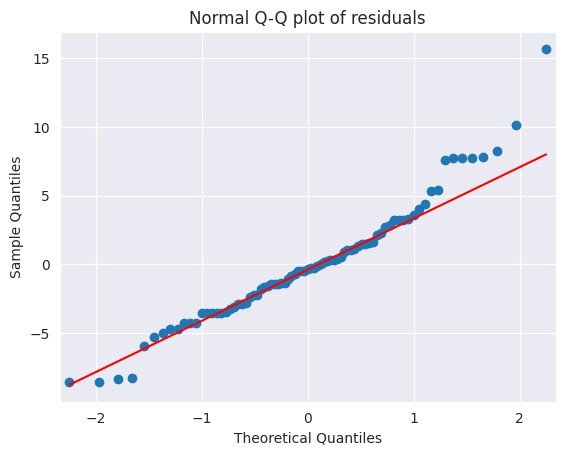

In [36]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
qqplot = sm.qqplot(model2.resid, line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()


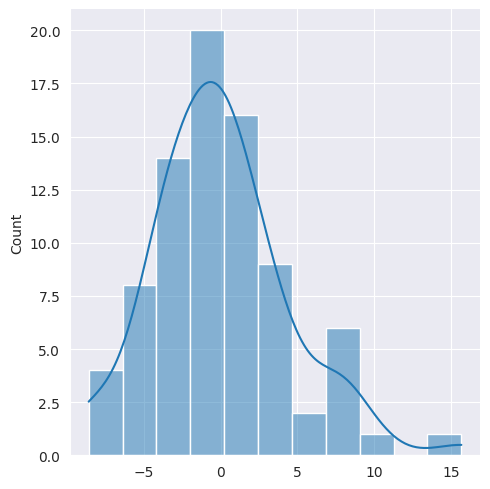

In [37]:
sns.displot(model2.resid, kde = True)

In [38]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.st

In [43]:
plt.figure(figsize=(6,4))
plt.scatter(get_standardized_values(model2.fittedvalues),
            get_standardized_values(model2.resid))


AttributeError: 'Series' object has no attribute 'st'

<Figure size 600x400 with 0 Axes>

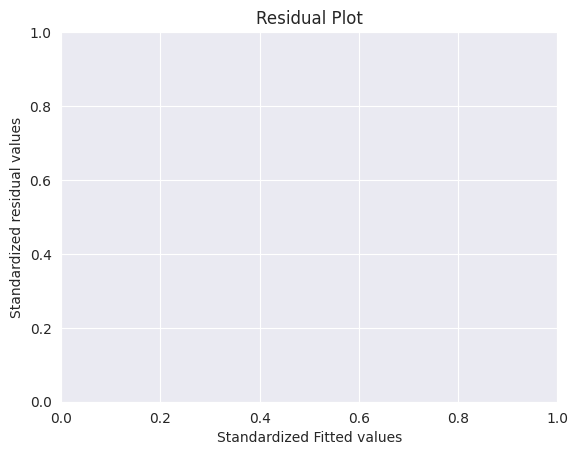

In [44]:
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()